<a href="https://colab.research.google.com/github/fannylg/Diplomado-CD-UNAM/blob/main/Practica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1: Preparación y Exploración de Datos

# Carga de datos

Paqueterías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
pd.set_option("display.max_rows",6000)
import cufflinks as cf
from varclushi import VarClusHi
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


El dataframe que utilizaremos contiene datos de precios de casas en dolares obtenidos de 'House Prices: Advanced Regression Techniques' en Kaggle, este conjunto incluye información detallada sobre diversas características de las casas, como tamaño del lote, numero de habitaciones, material de construcción, entre otros.
Todos estos factores influyen en el precio de venta de las casas.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Equipo 6/Practica_4/train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Tratamiento de valores nulos

In [ ]:
""" Porcentaje de valores nulos por variable """

valores_nulos = df.isnull().sum()
total_valores_nulos= valores_nulos.sum()
proporcion_valores_nulos = (valores_nulos / len(df)) * 100
print('Proporcion de valores nulos %')
print(proporcion_valores_nulos)
print('Total de valores nulos: ', total_valores_nulos)

Proporcion de valores nulos %
Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.60274

In [ ]:
""" Eliminamos estas columnas por la cantidad de valores nulos que contienen. """

df = df.drop(columns=['Id','Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])
df=df.dropna()

Valores extremos

In [ ]:
""" Método intercuartil para valores atípicos """

def IQR(df, columna):

    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    return df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]

IQR(df, 'SalePrice')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000
10,20,RL,70.0,11200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,129500


Tipo de datos

In [ ]:
""" Conteo de variables por tipo """

def get_feature_types(df):

    numeric_features = df.select_dtypes(include=['int', 'float','float64','int64']).columns.tolist()
    datetime_features = df.select_dtypes(include=['datetime64']).columns.tolist()
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()

    return numeric_features, datetime_features, categorical_features


target='saleprice'
num_featuers, datetime_feats, cat_featuers = get_feature_types(df)
print('num featuers: ',len(num_featuers))
print('num date featuers: ', len(datetime_feats))
print('num cat featuers: ', len(cat_featuers))
print('total featuers: ',len(df.columns))

num featuers:  37
num date featuers:  0
num cat featuers:  37
total featuers:  74


Valores infinitos

In [ ]:
""" Identificar variables con valores infinitos """

def valores_infinitos(df):

    check_inf = lambda x: isinstance(x, (int, float)) and np.isinf(x)
    inf_counts = df.applymap(check_inf)
    inf_values = inf_counts.sum().items()
    inf_variables = [var for var, n_inf in inf_values if n_inf > 0]

    return inf_variables

valores_infinitos(df)

[]

# Análisis Exploratorio Inicial

Estadísticas descriptivas

In [ ]:
""" Matriz de correlación con el 10% de la muestra total """

def matriz_de_correlacion(df, frac=0.1):

    non_numeric_df = df.select_dtypes(exclude=['number']).columns
    numeric_df = df.drop(columns=non_numeric_df)
    correlation_matrix = numeric_df.sample(frac=frac).corr()

    return correlation_matrix

matriz_de_correlacion(df, frac=0.1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.304953,-0.211953,0.114251,-0.085819,0.100639,0.165536,0.035927,-0.062291,0.018398,...,-0.042125,-0.016013,-0.119642,-0.041438,-0.029980,0.010701,-0.069195,0.112984,-0.170967,-0.030486
LotFrontage,-0.304953,1.000000,0.585666,0.245724,-0.084325,0.134502,0.046985,0.269023,0.636890,-0.097201,...,0.175902,0.289444,-0.078588,0.172027,0.020397,0.738633,0.010423,-0.162337,0.081511,0.140246
LotArea,-0.211953,0.585666,1.000000,0.271636,-0.108720,0.090556,0.008187,0.133457,0.508412,-0.009362,...,0.214590,0.215077,-0.060099,0.007811,0.008754,0.593917,0.003542,-0.006151,-0.077042,0.209641
OverallQual,0.114251,0.245724,0.271636,1.000000,-0.292096,0.683698,0.577820,0.289500,0.384923,0.112578,...,0.460482,0.259530,-0.118589,-0.065020,0.008478,0.254832,-0.102357,-0.005356,-0.239405,0.750386
OverallCond,-0.085819,-0.084325,-0.108720,-0.292096,1.000000,-0.493643,-0.087151,-0.155782,-0.178545,-0.016122,...,-0.086707,-0.200700,0.263486,-0.016843,0.010617,-0.056378,0.105926,0.158103,0.166560,-0.293585
YearBuilt,0.100639,0.134502,0.090556,0.683698,-0.493643,1.000000,0.706660,0.246911,0.265475,0.058608,...,0.430049,0.260571,-0.417309,-0.065714,-0.033966,0.106346,-0.107635,-0.026989,-0.179836,0.638292
YearRemodAdd,0.165536,0.046985,0.008187,0.577820,-0.087151,0.706660,1.000000,0.127424,0.152314,0.074983,...,0.436297,0.305040,-0.171696,-0.100531,-0.131287,0.098150,-0.075286,0.037455,-0.097914,0.504902
MasVnrArea,0.035927,0.269023,0.133457,0.289500,-0.155782,0.246911,0.127424,1.000000,0.359650,-0.043178,...,0.138889,0.019107,-0.121810,-0.040674,0.184273,0.264790,-0.082963,-0.094704,-0.078837,0.307906
BsmtFinSF1,-0.062291,0.636890,0.508412,0.384923,-0.178545,0.265475,0.152314,0.359650,1.000000,-0.062678,...,0.289473,0.285223,-0.049667,0.076882,-0.048523,0.746110,0.036972,-0.124147,-0.075078,0.334153
BsmtFinSF2,0.018398,-0.097201,-0.009362,0.112578,-0.016122,0.058608,0.074983,-0.043178,-0.062678,1.000000,...,-0.166912,0.197620,-0.032018,-0.032388,0.117920,-0.023543,-0.037517,-0.011004,0.018312,0.078801


In [ ]:
""" Variables con una correlación alta """

non_numeric_df = df.select_dtypes(exclude=['number']).columns
numeric_df = df.drop(columns=non_numeric_df)

correlation_matrix_abs = numeric_df.sample(frac=0.1).corr().abs()
high_correlation_mask = (correlation_matrix_abs > 0.8) & (correlation_matrix_abs < 1.0)
high_correlation_vars = (correlation_matrix_abs.mask(~high_correlation_mask).stack().reset_index().rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2', 0: 'Correlation'}))

print('Variables con correlacion muy alta (>0.8): ')
print(high_correlation_vars)

Variables con correlacion muy alta (>0.8): 
     Variable 1    Variable 2  Correlation
0   TotalBsmtSF      1stFlrSF     0.899698
1      1stFlrSF   TotalBsmtSF     0.899698
2     GrLivArea  TotRmsAbvGrd     0.801791
3  TotRmsAbvGrd     GrLivArea     0.801791


In [ ]:
""" Se eliminan estas 3 variables con una correlación muy alta para evitar problemas de multicolinealidad, contribuyendo a la reducción de variables """

numeric_df = numeric_df.drop(columns={'GarageYrBlt', 'TotalBsmtSF', 'TotRmsAbvGrd'})
numeric_df.shape

(1094, 34)

In [ ]:
numeric_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,56.128885,70.759598,10132.346435,6.247715,5.575868,1972.412249,1985.915905,109.855576,448.191956,45.252285,...,94.341865,46.946984,22.053016,3.266910,16.498172,3.007313,23.550274,6.335466,2007.786106,187033.263254
std,41.976345,24.508859,8212.249621,1.366797,1.066500,31.189752,20.930772,190.667459,468.728095,159.075003,...,122.624615,64.820019,61.570502,29.655973,58.455303,40.713175,167.135237,2.694558,1.334307,83165.332151
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7606.750000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,132500.000000
50%,50.000000,70.000000,9444.500000,6.000000,5.000000,1975.000000,1995.000000,0.000000,384.500000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165750.000000
75%,70.000000,80.000000,11387.250000,7.000000,6.000000,2003.000000,2005.000000,171.750000,712.750000,0.000000,...,169.750000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,221000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


Gráficas

In [ ]:
cf.go_offline()
cf.set_config_file(offline=True)

In [ ]:
""" histogramas
for col in numeric_df.columns:
    numeric_df[col].iplot(kind='hist', bins=10, title=f'Histograma de {col}') """

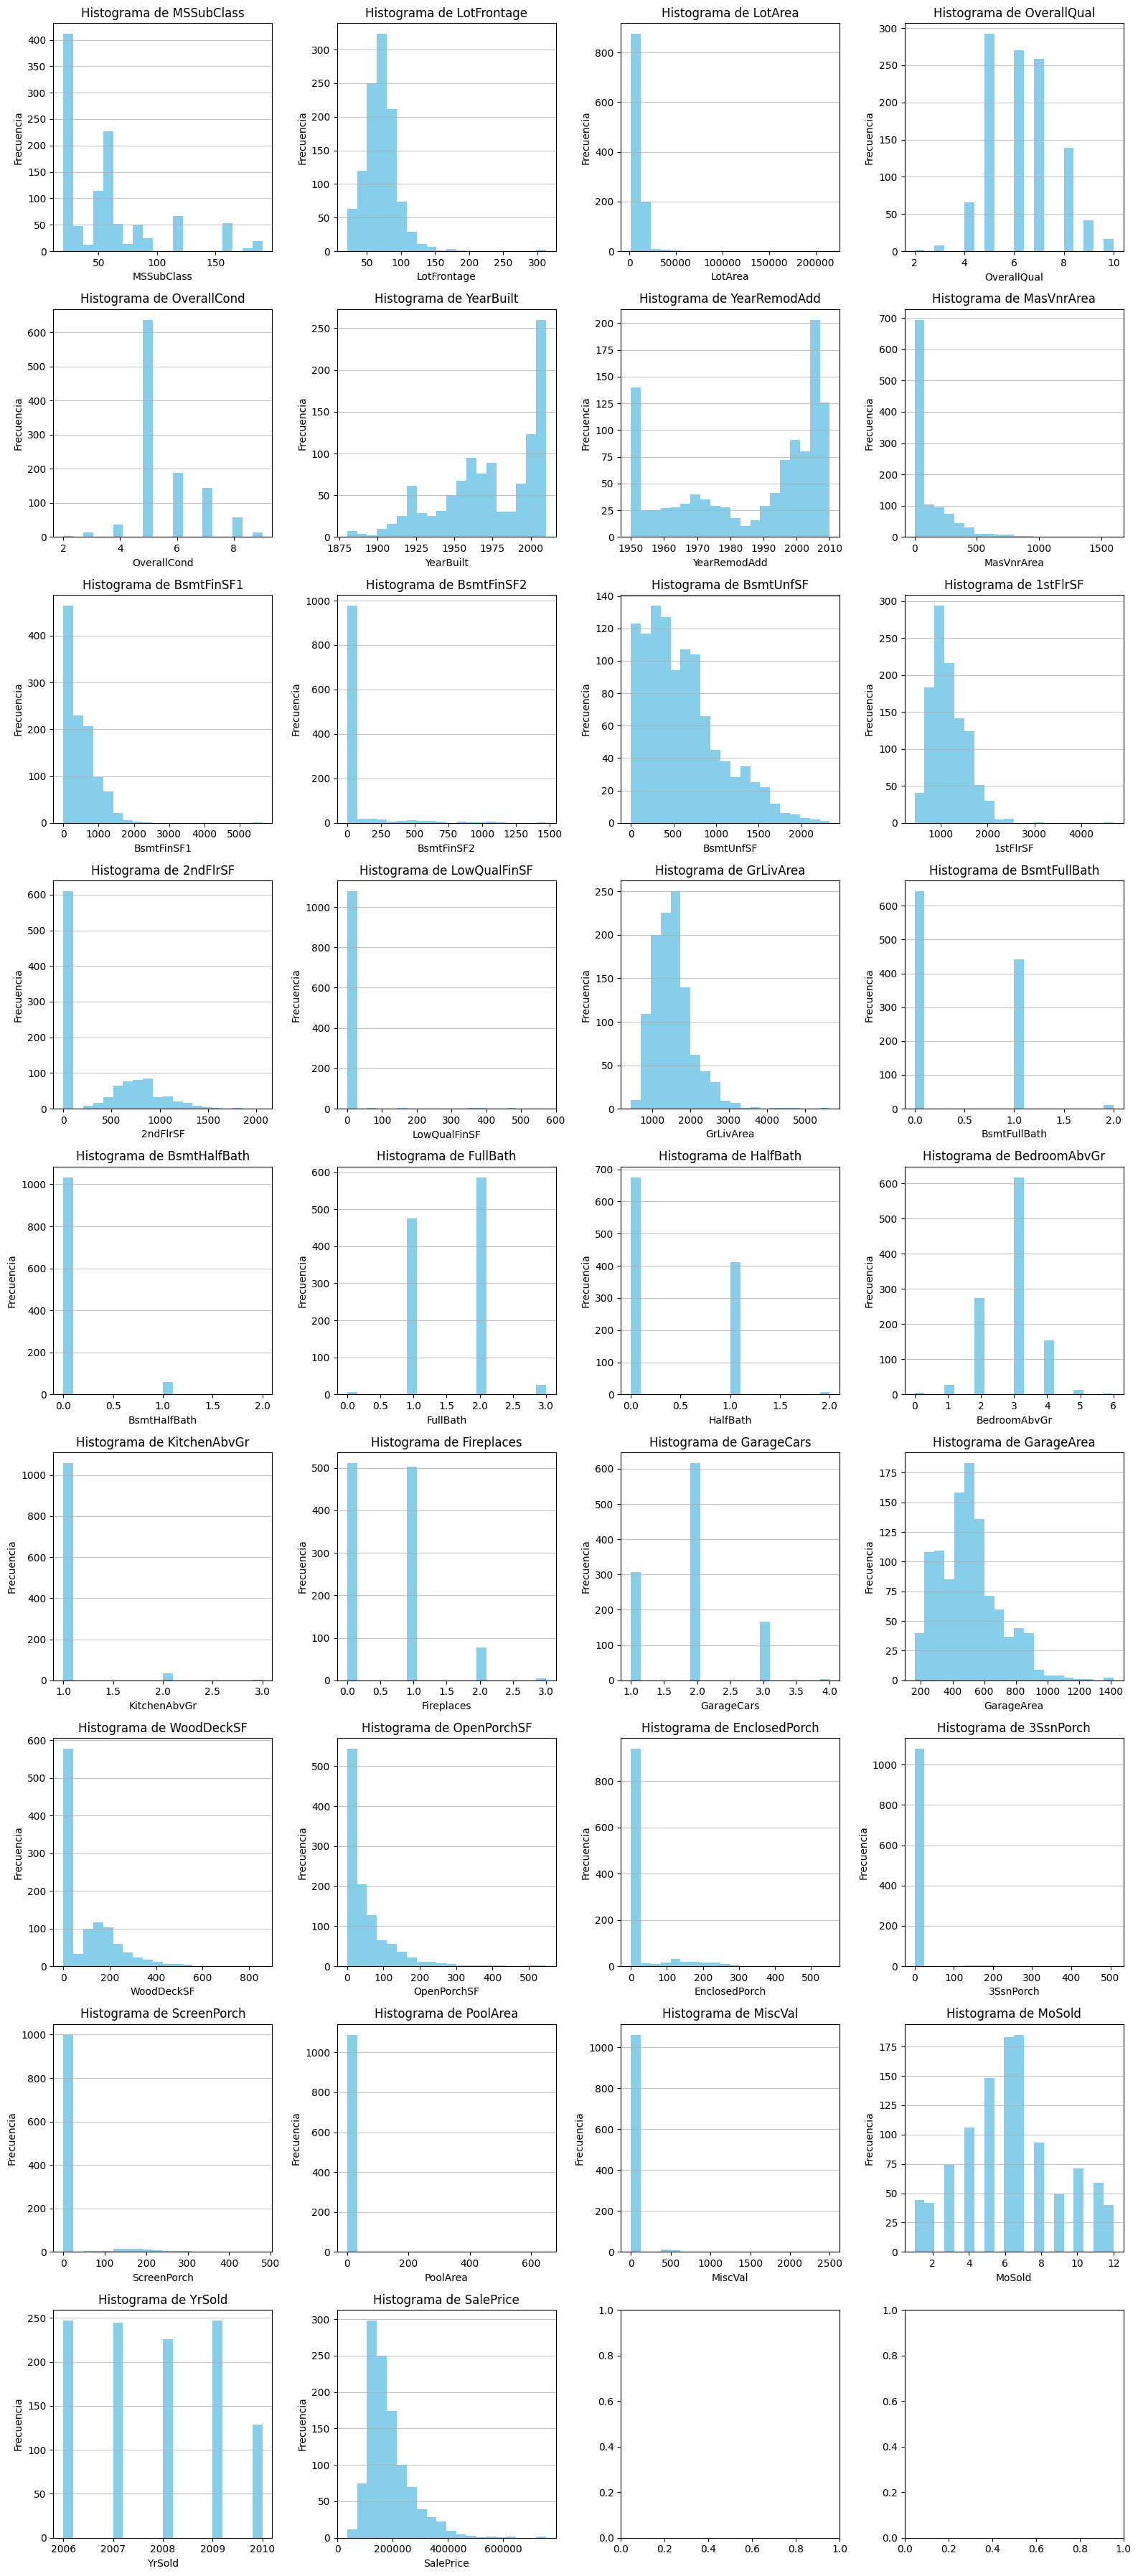

In [ ]:
def histogramas(df):
    # Calcular el número de filas y columnas según la cantidad de variables en el DataFrame
    num_variables = len(df.columns)
    num_filas = (num_variables + 3) // 4  # División entera para redondear hacia arriba
    num_columnas = min(num_variables, 4)

    # Crear la figura y los subplots
    fig, axs = plt.subplots(num_filas, num_columnas, figsize=(16, 4*num_filas))

    # Iterar a través de las variables y crear los histogramas en los subplots correspondientes
    for i, variable in enumerate(df.columns):
        fila = i // num_columnas
        columna = i % num_columnas
        axs[fila, columna].hist(df[variable], color='skyblue', bins=20)
        axs[fila, columna].set_title(f'Histograma de {variable}')
        axs[fila, columna].set_xlabel(variable)
        axs[fila, columna].set_ylabel('Frecuencia')
        axs[fila, columna].grid(axis='y', alpha=0.75)

    # Ajustar el espacio entre subplots
    plt.tight_layout()
    plt.show()

# Llamar a la función con el DataFrame numeric_df
histogramas(numeric_df)

In [ ]:
""" Boxplots

for col in numeric_df.columns:
    numeric_df[col].iplot(kind='box', bins=10, title=f'Histograma de {col}') """

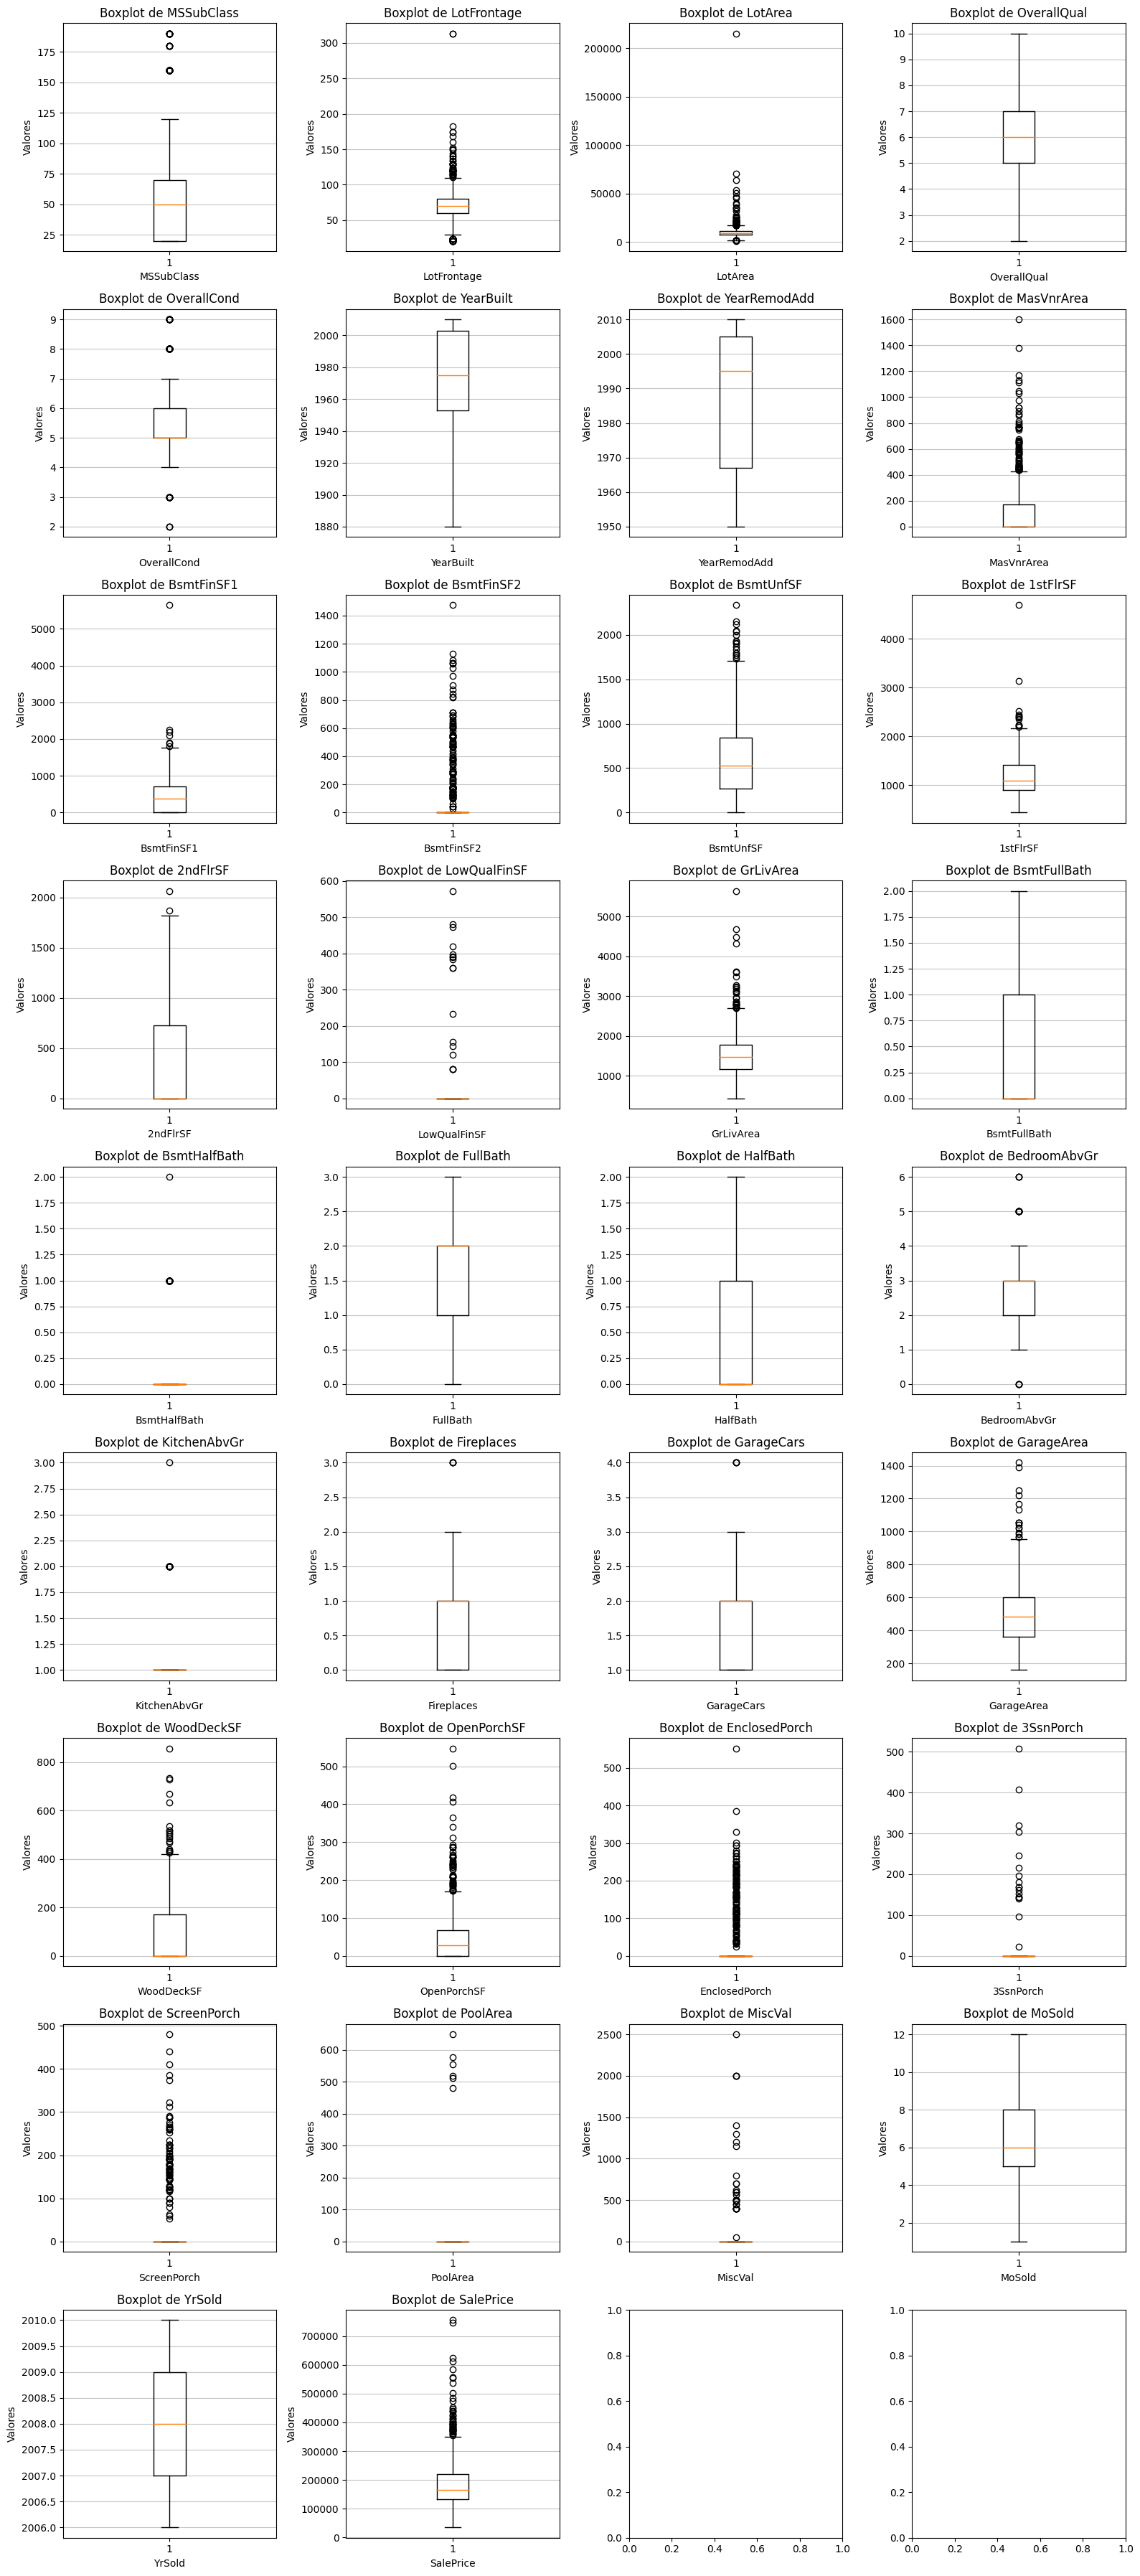

In [ ]:
import matplotlib.pyplot as plt

def boxplots(df):
    # Calcular el número de filas y columnas según la cantidad de variables en el DataFrame
    num_variables = len(df.columns)
    num_filas = (num_variables + 3) // 4  # División entera para redondear hacia arriba
    num_columnas = min(num_variables, 4)

    # Crear la figura y los subplots
    fig, axs = plt.subplots(num_filas, num_columnas, figsize=(16, 4*num_filas))

    # Iterar a través de las variables y crear los boxplots en los subplots correspondientes
    for i, variable in enumerate(df.columns):
        fila = i // num_columnas
        columna = i % num_columnas
        axs[fila, columna].boxplot(df[variable])
        axs[fila, columna].set_title(f'Boxplot de {variable}')
        axs[fila, columna].set_xlabel(variable)
        axs[fila, columna].set_ylabel('Valores')
        axs[fila, columna].grid(axis='y', alpha=0.75)

    # Ajustar el espacio entre subplots
    plt.tight_layout()
    plt.show()

# Llamar a la función con el DataFrame numeric_df
boxplots(numeric_df)

Escalamiento

In [ ]:
X = numeric_df.drop(columns='SalePrice')
X.shape

(1094, 33)

In [ ]:
minmax = MinMaxScaler()
minmax.fit(X)

MinMaxScaler()

In [ ]:
standar = StandardScaler()
standar.fit(X)

StandardScaler()

In [ ]:
Xmm = pd.DataFrame(minmax.transform(X), columns=X.columns)

In [ ]:
Xss = pd.DataFrame(standar.transform(X), columns=X.columns)

In [ ]:
X.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007


In [ ]:
Xmm.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.150685,0.033420,0.625,0.428571,0.946154,0.883333,0.1225,0.125089,0.0,...,0.308426,0.000000,0.111517,0.0,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.000000,0.202055,0.038795,0.500,0.857143,0.738462,0.433333,0.0000,0.173281,0.0,...,0.238474,0.347725,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,0.25


In [ ]:
Xss.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.092264,-0.235108,-0.204952,0.550652,-0.540208,0.981147,0.816592,0.452011,0.550268,-0.284601,...,0.230206,-0.769707,0.216900,-0.358339,-0.110211,-0.282365,-0.0739,-0.14097,-1.609707,0.160377
1,-0.861090,0.377195,-0.064853,-0.181320,2.274018,0.115082,-0.473964,-0.576427,1.130827,-0.284601,...,-0.227714,1.661585,-0.724598,-0.358339,-0.110211,-0.282365,-0.0739,-0.14097,-0.495843,-0.589419


# Parte 2: Multicolinealidad y Reducción de Dimensiones

# Multicolinealidad con VarClusHi

In [ ]:
vc = VarClusHi(Xmm)

In [ ]:
vc.varclus()

In [ ]:
clusters = vc.rsquare

In [ ]:
clusters

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,OverallQual,0.696420,0.221587,0.389998
1,0,YearBuilt,0.589503,0.191535,0.507748
2,0,YearRemodAdd,0.514058,0.094642,0.536740
3,0,MasVnrArea,0.267601,0.101621,0.815245
4,0,FullBath,0.539512,0.229240,0.597447
5,0,GarageCars,0.698041,0.175382,0.366180
6,0,GarageArea,0.629343,0.216803,0.473261
7,0,OpenPorchSF,0.196424,0.071718,0.865660
8,1,BsmtFinSF1,0.774315,0.181218,0.275635
9,1,BsmtUnfSF,0.626536,0.095003,0.412669


# Poder predictivo

In [ ]:
X = Xss
y = df['SalePrice']

In [ ]:
kb = SelectKBest(k='all', score_func=f_regression)
kb.fit(X,y)

SelectKBest(k='all', score_func=<function f_regression at 0x7fe5194e6a70>)

In [ ]:
scores = pd.DataFrame(zip(X.columns, kb.scores_)).sort_values(by=1, ascending=False)

In [ ]:
scores

,0,1
3,OverallQual,1881.206264
14,GrLivArea,1094.317348
22,GarageCars,807.917532
23,GarageArea,684.645083
11,1stFlrSF,673.687042
17,FullBath,548.697291
5,YearBuilt,412.097037
6,YearRemodAdd,404.296114
7,MasVnrArea,336.612058
21,Fireplaces,290.156522


In [ ]:
#pip install chart_studio

# Parte 3: Transformación Entropica con IV y WoE

### Explicar los conceptos de Valor de Información (IV) y Peso de Evidencia (WoE).


### Peso de Evidencia (WoE)

El **Peso de Evidencia (WoE)** es una medida estadística que se utiliza para evaluar la capacidad de una variable predictor en la diferenciación de entre eventos 'buenos' y 'malos'. Se calcula con la siguiente fórmula:

$$
\text{WoE} = \ln\left(\frac{\text{Proporción de Buenos}}{\text{Proporción de Malos}}\right)
$$

Donde:
- *Proporción de Buenos* es la proporción de casos positivos (ejemplo: clientes que pagaron a tiempo).
- *Proporción de Malos* es la proporción de casos negativos (ejemplo: clientes que no pagaron a tiempo).

El WoE proporciona una valoración cuantitativa que refleja la importancia de una característica en la predicción de un fenómeno. Los valores positivos indican una asociación con la clase 'Buena', mientras que los valores negativos indican una asociación con la clase 'Mala'.

### Valor de Información (IV)

El **Valor de Información (IV)** ayuda a determinar el poder predictivo de una variable independiente respecto a la variable dependiente. El IV se calcula sumando los productos de la diferencia en las proporciones de buenos y malos resultados por el WoE para cada grupo de la variable:

$$
\text{IV} = \sum (\text{Proporción de Buenos} - \text{Proporción de Malos}) \times \text{WoE}
$$

La interpretación del IV es la siguiente:
- **< 0.02**: Inútil para la predicción.
- **0.02 a 0.1**: Predictor débil.
- **0.1 a 0.3**: Predictor medio.
- **0.3 a 0.5**: Predictor fuerte.
- **> 0.5**: Muy fuerte predictor.

El IV es especialmente popular en el sector financiero para el desarrollo de modelos de scoring crediticio, donde es crucial comprender y predecir el comportamiento del cliente.


### Implementar una función para calcular IV y WoE para las variables categóricas del conjunto de datos.


In [ ]:
import numpy as np
import pandas as pd

def calculate_woe_iv(dataframe, feature, target):
    """
    Calcula el Peso de Evidencia (WoE) y el Valor de Información (IV) para una variable categórica.

    Parámetros:
    - dataframe: pandas.DataFrame que contiene los datos.
    - feature: str, el nombre de la columna de la variable categórica.
    - target: str, el nombre de la columna del objetivo/binaria (1 para buenos, 0 para malos).

    Retorna:
    - Un DataFrame con las categorías, WoE, IV y otras métricas útiles para cada categoría.
    """
    # Agrupa por la característica y calcula el total y la suma de eventos buenos y malos
    data = pd.crosstab(dataframe[feature], dataframe[target]).reset_index()
    data.columns = [feature, 'Bad', 'Good']

    # Calcula la proporción de buenos y malos
    data['Total'] = data['Good'] + data['Bad']
    data['Distr Good'] = data['Good'] / data['Good'].sum()
    data['Distr Bad'] = data['Bad'] / data['Bad'].sum()

    # Reemplaza los ceros para evitar divisiones por cero en el logaritmo
    data['Distr Good'] = data['Distr Good'].replace(0, np.nan)
    data['Distr Bad'] = data['Distr Bad'].replace(0, np.nan)

    # Calcula WoE
    data['WoE'] = np.log(data['Distr Good'] / data['Distr Bad'])

    # Calcula el IV
    data['IV'] = (data['Distr Good'] - data['Distr Bad']) * data['WoE']

    # Remueve filas con valores NaN (debido a la presencia de ceros en las distribuciones)
    data = data.dropna()

    # Suma de IV para determinar el poder predictivo de la variable entera
    iv = data['IV'].sum()

    print(f"IV total para {feature}: {iv}")

    return data[['WoE', 'IV']].sort_values(by='WoE')




In [ ]:
# Ejemplo de uso:
# df es tu DataFrame, 'variable_categorica' es tu variable categórica y 'target' es tu variable objetivo
# resultado = calculate_woe_iv(df, 'variable_categorica', 'target')

### Utilizar estos criterios para evaluar y seleccionar variables significativas para el modelo.


# PARTE 4: Funciones

lib_equipo6/

│

├── __init__.py

├── stats_tools.py

└── ml_tools.py


Dentro de stats_tools.py, se incluirán las funciones para VarClusHi, PCA y SelectKBest. En ml_tools.py, se incluirán las funciones para calcular WoE y IV.


#### VarClusHi

#### PCA

####  SelectKBest

#### Cálculo de IV

####  WoE